#  Author:- Smriti Kumari

### Grip @ Sparks Foundation

## Task #2:  Prediction  Using Unsupervised ML With Python

#### In this task we will predict the optimum number of clusters and represent it visually from 'Iris Datasets'.


## Step:-1 Importing  the Required Libraries

In [2]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
from sklearn import datasets;
import seaborn as sns;
from sklearn.cluster import KMeans;

##  Step:-2 Creating DataFrame Structure

In [3]:
iris=datasets.load_iris()
iris_df=pd.DataFrame(iris.data,columns=iris.feature_names)
print(iris_df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


In [4]:

df=pd.DataFrame({
    "a" : iris.data[:,0],
    "b" : iris.data[:,1],
    "c" : iris.data[:,2],
    "d" : iris.data[:,3],
    "cluster" : iris.target
})

In [5]:
df

,a,b,c,d,cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## Step:-3 Ploting the Points

Text(0, 0.5, 'SepalWidth')

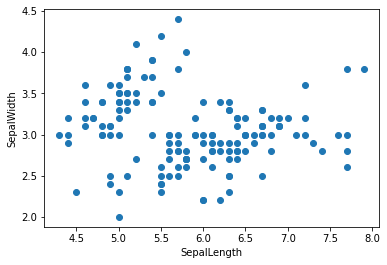

In [6]:
plt.scatter(df.a,df.b)
plt.xlabel("SepalLength")
plt.ylabel("SepalWidth")

Text(0, 0.5, 'PetalWidth')

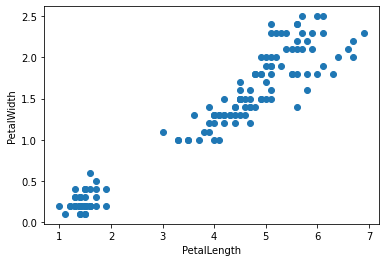

In [7]:
plt.scatter(df.c,df.d)
plt.xlabel("PetalLength")
plt.ylabel("PetalWidth")

## Step:-4 How to find optimum number of cluster of K-Means

In [8]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values
sse=[]
k_rng=range(1,11)
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(x)
    sse.append(km.inertia_)
    

D:\python1\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


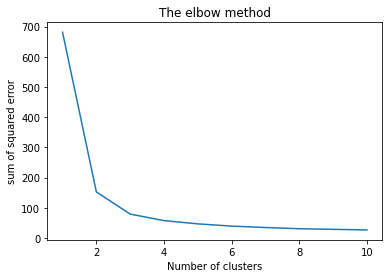

In [9]:
plt.plot(k_rng,sse)
plt.title("The elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("sum of squared error")
plt.show()

#### You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when theSum of Squared Error(sse) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as ** '3**'.


## Step:-5 Applying K-Means 

In [10]:
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(x)
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [11]:
df['cluster']=y_predicted
df.head()

,a,b,c,d,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


## Step:-6 Plotting the Centeroids of Clusters

In [12]:
km.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [13]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]


## Step:-7 Visualization of Clusters

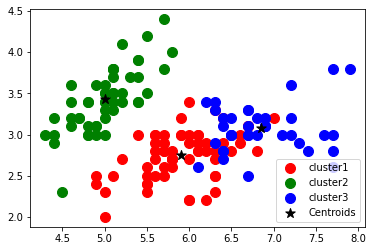

In [15]:
plt.scatter(df1.a,df1.b,                                                  # on the first two columns
           s=100,c='red',label='cluster1') 
plt.scatter(df2.a,df2.b, 
            s=100,c='green',label='cluster2')
plt.scatter(df3.a,df3.b,
            s=100,c='blue',label='cluster3')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1],   # Plotting the Centeroids of Clusters
            s = 100, c = 'black', label = 'Centroids',marker="*")
plt.legend()

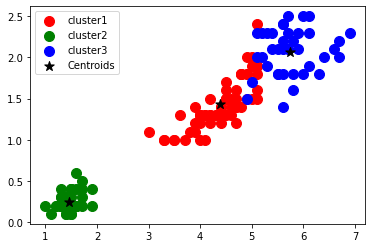

In [16]:
plt.scatter(df1.c,df1.d,                                                    # on the rest of columns
           s=100,c='red',label='cluster1')
plt.scatter(df2.c,df2.d, 
            s=100,c='green',label='cluster2')
plt.scatter(df3.c,df3.d,
            s=100,c='blue',label='cluster3')

plt.scatter(km.cluster_centers_[:, 2], km.cluster_centers_[:,3],            # Plotting the Centeroids of the Clusters
            s = 100, c = 'black', label = 'Centroids',marker="*")
plt.legend()